<a href="https://colab.research.google.com/github/ardhiraka/commwebinar1/blob/master/Community_Webinar_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1><font size = 5>Community Event // Menganalisa Data Dengan Python</font></h1></center>

Title: Community Event // Menganalisa Data Dengan Python <br/>
Last Updated: May 31, 2021 <br/>
Author: Hacktiv8 Data Science Curriculum Team

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
netflix_overall = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/commwebinar1/master/dataset/netflix_titles.csv")

netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Therefore, it is clear that the dataset contains 12 columns for exploratory analysis.

In [3]:
netflix_overall.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [4]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show']


In [5]:
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie']

In [6]:
# !!pip install pandas-profiling==2.7.1
from pandas_profiling import ProfileReport

profile = ProfileReport(netflix_overall, title='Netflix Profiling Report')

profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Analysis of Movies vs TV Shows.

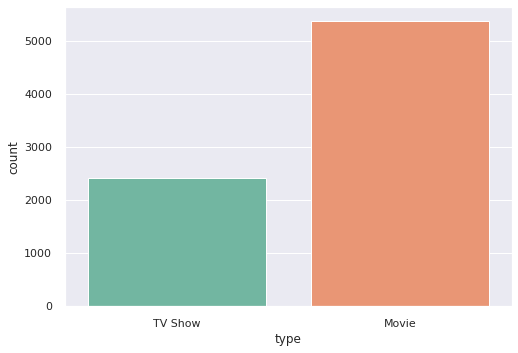

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x = "type",
                   data = netflix_overall,
                   palette = "Set2")

It is evident that there are more Movies on Netflix than TV shows.

## Release Date
If a producer wants to release some content, which month must he do so? ( Month when least amount of content is added)

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


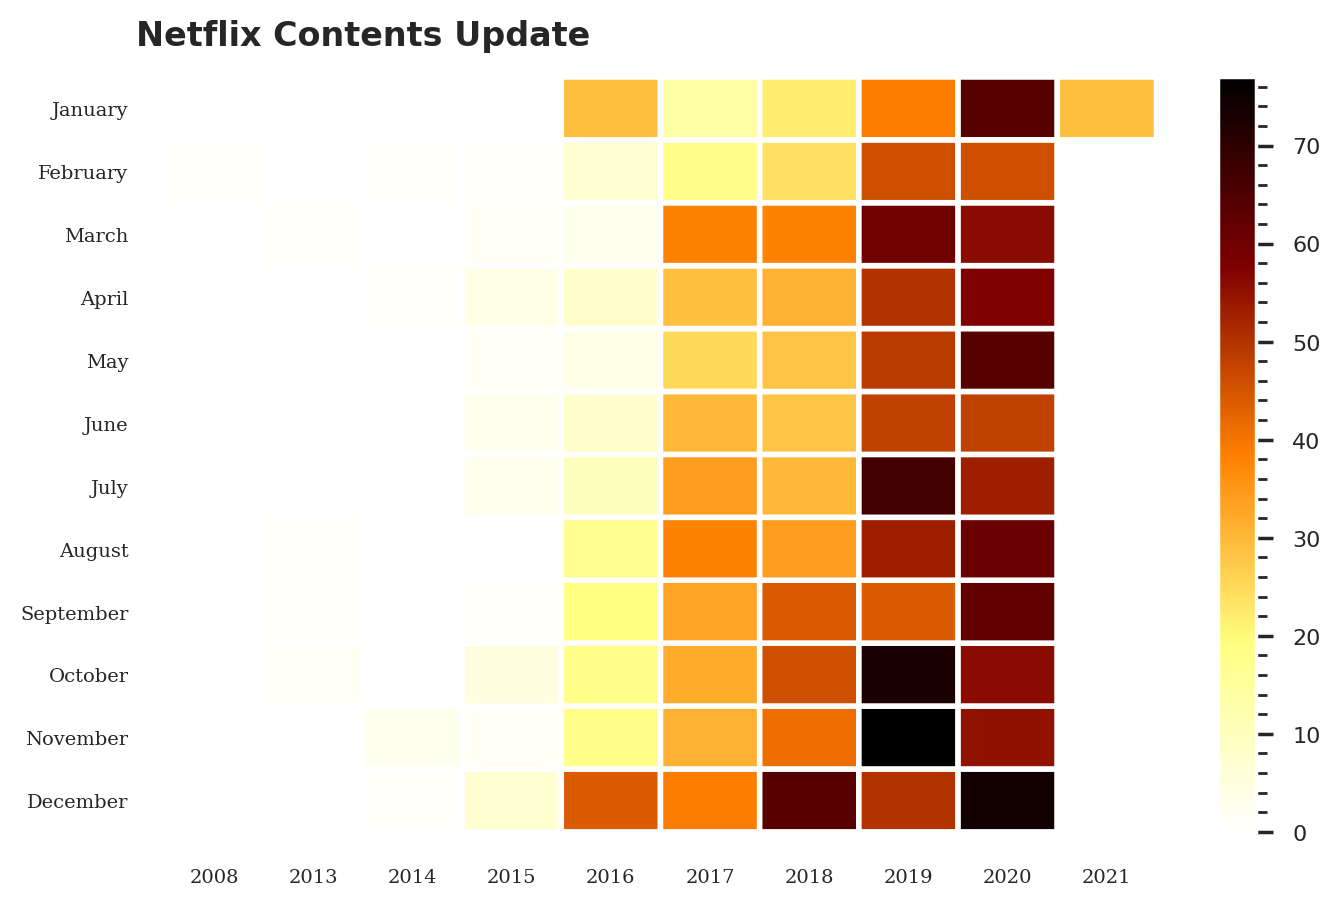

In [8]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(8, 5), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

## Movie ratings analysis

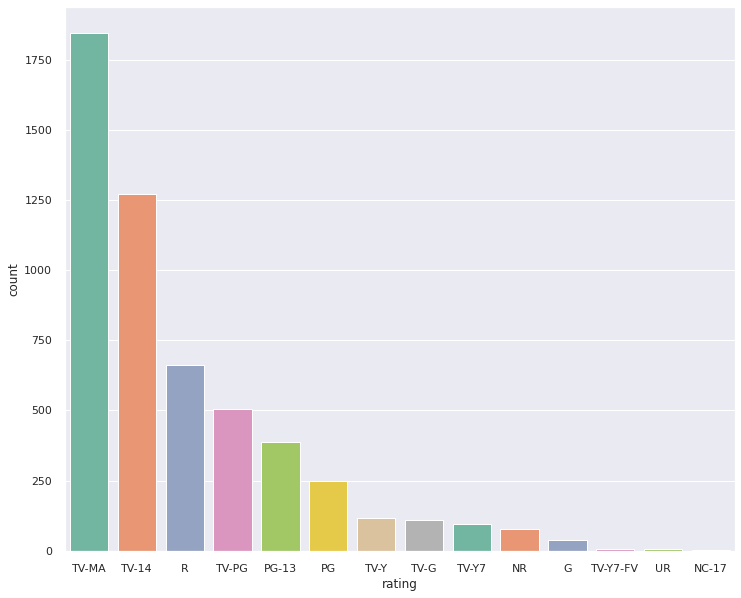

In [9]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = "rating",
                   data = netflix_movies,
                   palette = "Set2",
                   order = netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating.

"TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the  very popular 'R' rating. An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

## Analysing IMDB ratings to get top rated movies on Netflix

In [10]:
imdb_ratings=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/commwebinar1/master/dataset/IMDb%20ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/commwebinar1/master/dataset/IMDb%20movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [11]:
ratings.dropna()

joint_data = ratings.merge(netflix_overall,
                           left_on = 'Title',
                           right_on = 'title',
                           how = 'inner')
joint_data = joint_data.sort_values(by = 'Rating',
                                    ascending = False)

Top rated 10 movies on Netflix are:

In [12]:
# !pip install plotly==4.8.2
import plotly.express as px

top_rated = joint_data[0:10]

fig = px.sunburst(
     top_rated,
     path = ['title','country'],
     values = 'Rating',
     color = 'Rating')

fig.show()

Countries with highest rated content.

In [13]:
country_count = joint_data['country'].value_counts().sort_values(ascending = False)
country_count = pd.DataFrame(country_count)
topcountries = country_count[0:11]

topcountries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


## Year wise analysis

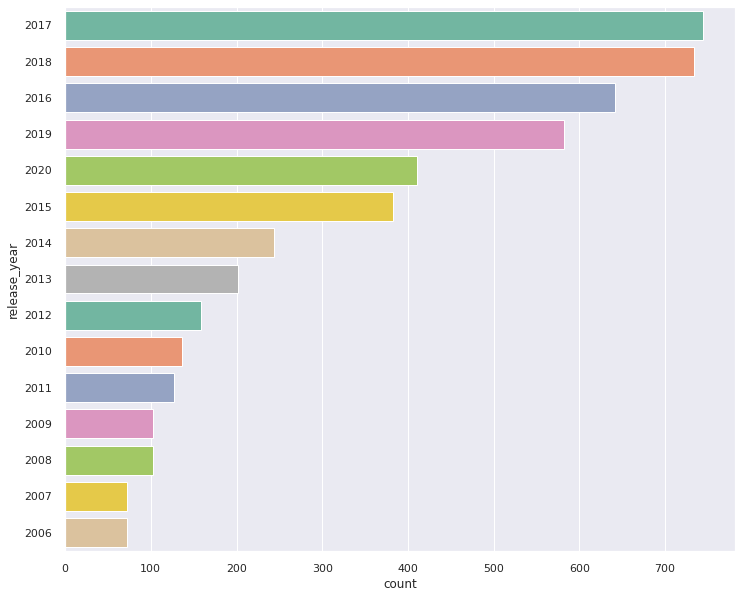

In [14]:
plt.figure(figsize=(12,10))

ax = sns.countplot(y = "release_year", 
                   data = netflix_movies, 
                   palette = "Set2", 
                   order = netflix_movies['release_year'].value_counts().index[0:15])

So, 2017 was the year when most of the movies were released.

In [15]:
countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
cou = list(netflix_movies['country'])

for i in cou:
    i = list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [16]:
countries_fin = {}
for country, no in countries.items():
    country = country.replace(' ', '')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no
        
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key = lambda item: item[1], reverse = True)}

## Top 10 Country Movie Creator

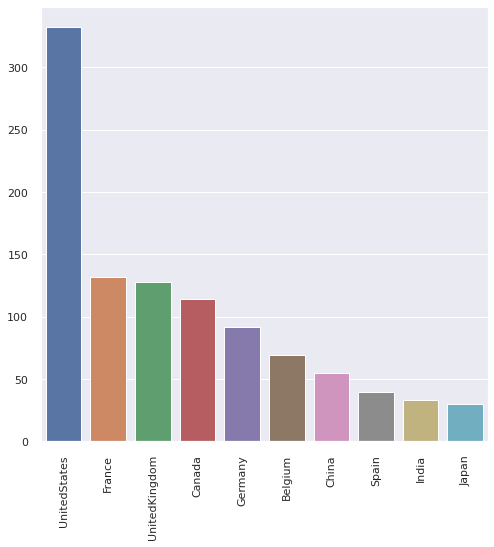

In [17]:
plt.figure(figsize=(8, 8))

ax = sns.barplot(x = list(countries_fin.keys())[0:10],
                 y = list(countries_fin.values())[0:10])

ax.set_xticklabels(list(countries_fin.keys())[0:10],
                   rotation = 90)
plt.show()

## Analysis of duration of movies

In [18]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'] = netflix_movies['duration'].astype(str).astype(int)

netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

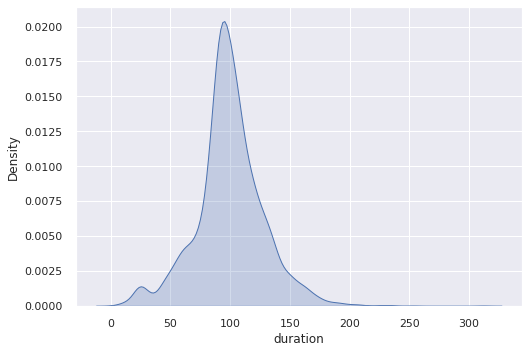

In [19]:
sns.kdeplot(data = netflix_movies['duration'],
            shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting. Can you? :p

In [20]:
from collections import Counter

genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))

g = Counter(gen)

## WordCloud for Genres

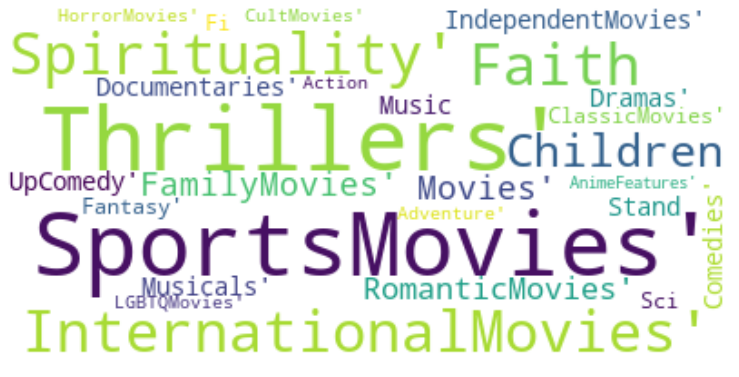

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

wordcloud = WordCloud(max_words = 1000000,
                      background_color = "white").generate(str(text))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Plot of Genres on Netflix

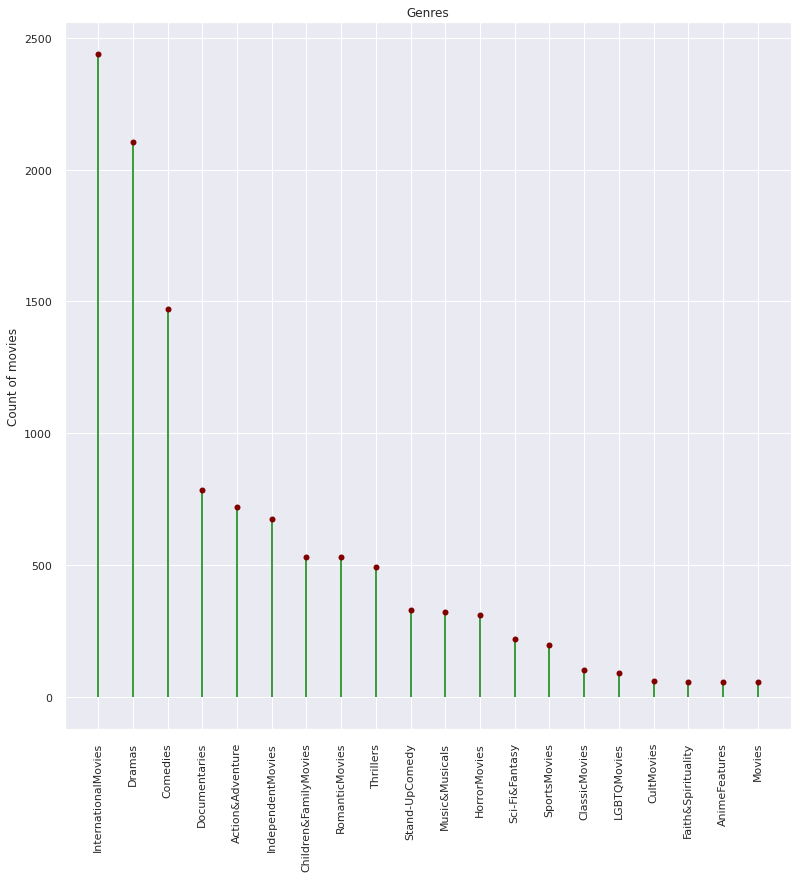

<Figure size 720x720 with 0 Axes>

In [22]:
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x = list(g.keys())
y = list(g.values())

ax.vlines(x,
          ymin=0,
          ymax=y,
          color='green')

ax.plot(x,
        y,
        "o",
        color='maroon')

ax.set_xticklabels(x,
                   rotation = 90)

ax.set_ylabel("Count of movies")
ax.set_title("Genres")

plt.show()

Therefore, it is clear that international movies, dramas and comedies are the top three genres that have the highest amount of content on Netflix.

## Analysis of TV Series on Netflix

In [23]:
countries1 = {}

netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')
cou1 = list(netflix_shows['country'])

for i in cou1:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [24]:
countries_fin1 = {}

for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1 = {k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}


## Most country creating TV Shows

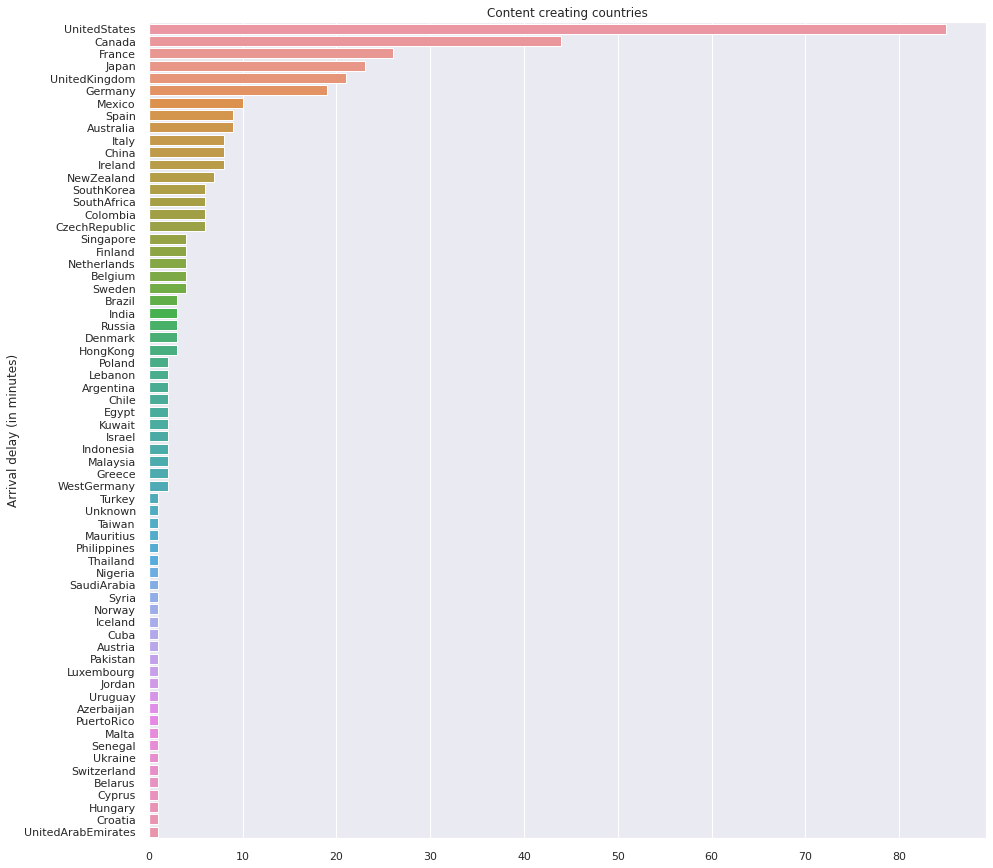

In [25]:
plt.figure(figsize=(15,15))

plt.title("Content creating countries")

sns.barplot(y=list(countries_fin1.keys()),
            x=list(countries_fin1.values()))

plt.ylabel("Arrival delay (in minutes)")
plt.show()

Naturally, United States has the most content that is created on netflix in the tv series category.

In [26]:
features = ['title','duration']
durations = netflix_shows[features]

durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')

durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s','')

In [27]:
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)

## TV shows with largest number of seasons

In [28]:
t = ['title','no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)

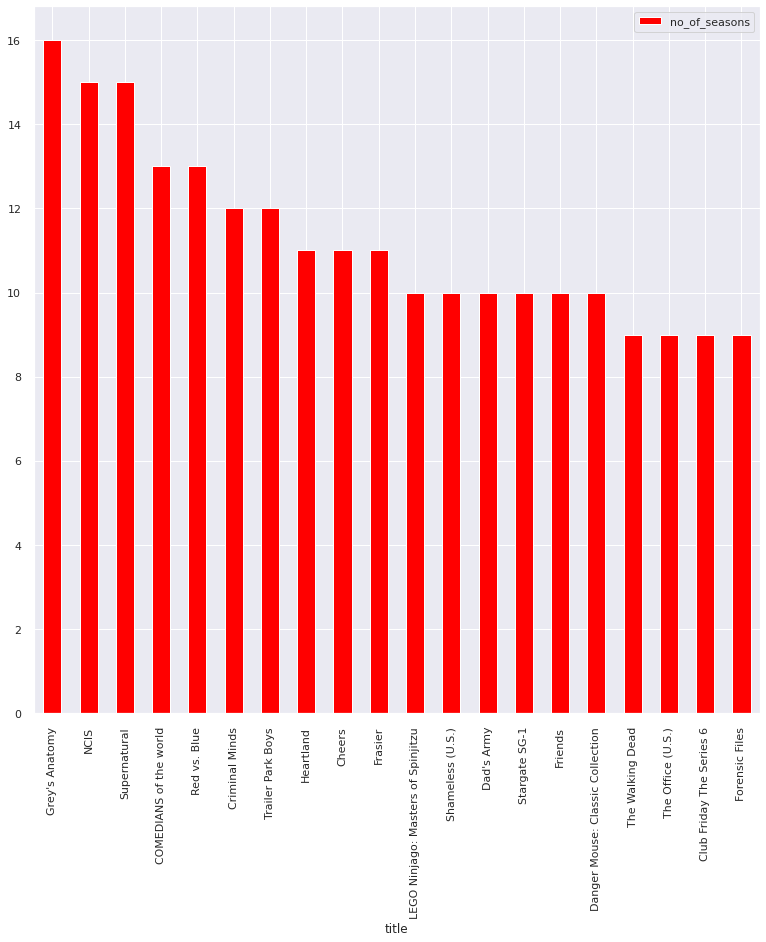

In [29]:
top20 = top[0:20]
top20.plot(kind='bar',
           x = 'title',
           y = 'no_of_seasons', 
           color = 'red')

Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

## Lowest number of seasons.

In [30]:
bottom = top.sort_values(by='no_of_seasons')
bottom = bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                               cells=dict(values=[bottom['title'], bottom['no_of_seasons']],
                                          fill_color='lavender'))])
fig.show()

These are some binge-worthy shows that are short and have only one season.

In [31]:
genres = list(netflix_shows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))

g = Counter(gen)

## Word Cloud for Genres

A word cloud is an image made of words that together resemble a cloudy shape.

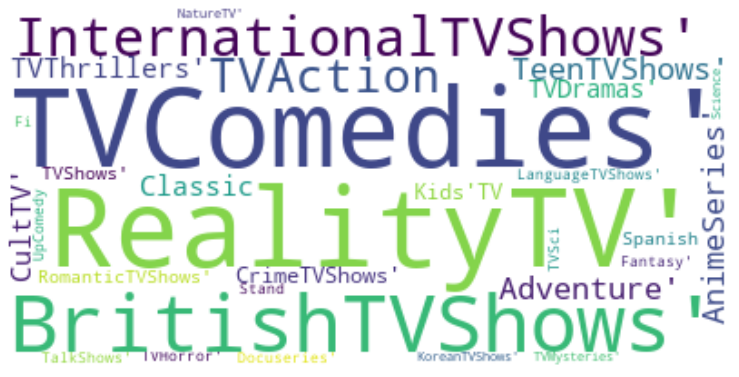

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

wordcloud = WordCloud(max_words=1000000,
                      background_color="white").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
us_series_data = netflix_shows[netflix_shows['country'] == 'United States']

In [34]:
oldest_us_series = us_series_data.sort_values(by = 'release_year')[0:20]

In [35]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],
                                           fill_color='paleturquoise'),
                               cells=dict(values=[oldest_us_series['title'], oldest_us_series['release_year']],
                                          fill_color='pink'))])
fig.show()

Above table shows the oldest US tv shows on Netflix.

In [36]:
newest_us_series = us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [37]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],
                                           fill_color='yellow'),
                               cells=dict(values=[newest_us_series['title'], newest_us_series['release_year']],
                                          fill_color='lavender'))])
fig.show()

The above are latest released US television shows!

## Content in Indonesia

In [38]:
netflix_id = netflix_overall[netflix_overall['country']=='Indonesia']
nannef = netflix_id.dropna()

import plotly.express as px

fig = px.treemap(nannef,
                 path=['country','director'],
                 color='director',
                 hover_data=['director','title'],
                 color_continuous_scale='Purples')

fig.show()

It is very interesting to note that the content in France is very rational. There is no director in the data who has a large number of movies. In my opinion, it shows how different directors are given a chance to showcase their talents. What do you think?

In [39]:
newest_id_series = netflix_id.sort_values(by='release_year', ascending=False)[0:20]

In [40]:
newest_id_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7591,s7592,Movie,Whipped,Chandra Liow,"Andovi da Lopez, Jovial da Lopez, Chandra Liow...",Indonesia,"September 18, 2020",2020,TV-14,98 min,"Comedies, International Movies, Romantic Movies",Four buddies attend a class taught by a love g...
5987,s5988,Movie,Tarung Sarung,Archie Hekagery,"Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...",Indonesia,"December 31, 2020",2020,TV-PG,116 min,"Action & Adventure, Dramas, Faith & Spirituality","Wealthy and spoiled, a young man finds somethi..."
3764,s3765,Movie,Love Like the Falling Rain,Lasja Fauzia Susatyo,"Jefri Nichol, Aurora Ribero, Axel Matthew, Nad...",Indonesia,"October 15, 2020",2020,TV-14,87 min,"Dramas, International Movies, Romantic Movies","Fearing rejection, a young man struggles to de..."
4098,s4099,Movie,Milea,"Fajar Bustomi, Pidi Baiq","Iqbaal Ramadhan, Vanesha Prescilla, Ira Wibowo...",Indonesia,"June 13, 2020",2020,TV-14,100 min,"Dramas, International Movies, Romantic Movies","Years after his teen romance with Milea, a now..."
32,s33,Movie,#FriendButMarried 2,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,"June 28, 2020",2020,TV-G,104 min,"Dramas, International Movies, Romantic Movies",As Ayu and Ditto finally transition from best ...
4640,s4641,Movie,One Day We'll Talk About Today,Angga Dwimas Sasongko,"Rachel Amanda, Rio Dewanto, Shelia Dara, Donny...",Indonesia,"May 23, 2020",2020,TV-G,128 min,"Dramas, International Movies","Harboring a deep secret, a seemingly happy fam..."
5594,s5595,Movie,Si Doel the Movie 3,Rano Karno,"Rano Karno, Cornelia Agatha, Maudy Koesnaedi, ...",Indonesia,"May 23, 2020",2020,TV-G,93 min,"Dramas, International Movies, Music & Musicals",Torn between reuniting with one family and lea...
1297,s1298,TV Show,Check The Store Next Door: The Next Chapter,NaN,"Ernest Prakasa, Chew Kin Wah, Dion Wiyoko, Mor...",Indonesia,"December 2, 2020",2020,TV-14,2 Seasons,"International TV Shows, TV Comedies, TV Dramas",When a former shop owner grows bored of retire...
1520,s1521,Movie,Crazy Awesome Teachers,Sammaria Sari Simanjuntak,"Gading Marten, Dian Sastrowardoyo, Faradina Mu...",Indonesia,"August 17, 2020",2020,TV-PG,102 min,"Comedies, Dramas, International Movies","When staff salaries get stolen at his school, ..."
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,"January 7, 2021",2020,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m..."


In [41]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                               cells=dict(values=[newest_id_series['title'], newest_id_series['release_year']]))])
fig.show()

## Top Duration

In [42]:
topdirs = pd.value_counts(netflix_overall['duration'])
fig = go.Figure([go.Bar(x=topdirs.index,
                        y=topdirs.values,
                        text=topdirs.values,
                        marker_color='indianred')])

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

It can be inferred that having one season is the most preferred duration.

## A little interesting history

Even though it may look like Netflix is fairly new, it has been around since 1997! 

Here's a picture of the older Netflix website when rentals costed only 50 cents each and the website had only about 900 titles.

![](https://producthabits.com/wp-content/uploads/2018/04/Screenshot-2018-03-26-16.08.07.png)

## How many Netflix Shows/ Movies are made from books as their storylines?

For a detailed book recommendation system with both content and collaborative filtering click :
    [Book Recommendation, EDA](https://www.kaggle.com/niharika41298/netflix-or-books-recommender-analysis-eda)

In [43]:
books = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/commwebinar1/master/dataset/books.csv')

books['original_title'] = books['original_title'].str.lower()
x = netflix_overall
x['title'] = x['title'].str.lower()

t = x.merge(books, left_on='title', right_on='original_title', how="inner")

In [44]:
t.shape

(289, 35)

In [45]:
import plotly.graph_objects as go

labels = ['Shows from books', 'Shows not from books']
values = [248, 6234]

fig = go.Figure(data=[go.Pie(labels = labels, values = values)])

fig.show()

## Content based filtering on multiple metrics

Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

Filling null values with empty string.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

netflix_overall['description'] = netflix_overall['description'].fillna('')

tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

tfidf_matrix.shape

(7787, 17905)

In [47]:
filledna = netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


Cleaning the data - making all the words lower case

In [48]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Identifying features on which the model is to be filtered.

In [49]:
features = ['title', 'director', 'cast', 'listed_in', 'description']
filledna = filledna[features]

In [50]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,7:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."


Creating a "soup" or a "bag of words" for all rows.

In [51]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [52]:
filledna['soup'] = filledna.apply(create_soup, axis=1)


From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [54]:
filledna = filledna.reset_index()
indices = pd.Series(filledna.index, index = filledna['title'])

In [55]:
def get_recommendations_new(title, cosine_sim = cosine_sim):
    title = title.replace(' ','').lower()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return netflix_overall['title'].iloc[movie_indices]

In [56]:
get_recommendations_new('Attack On Titan', cosine_sim2)

995                                   blue exorcist
3853                   magi: the labyrinth of magic
3472                            kuroko's basketball
947                                    black butler
6304    the disastrous life of saiki k.: reawakened
4657                                  one-punch man
6303                the disastrous life of saiki k.
676                    back street girls -gokudols-
3852                      magi: adventure of sinbad
7740                              your lie in april
Name: title, dtype: object

In [57]:
get_recommendations_new('Sherlock', cosine_sim2)

3943              mark gatiss: a study in sherlock
3412                                 kiss me first
2381                                      get even
2846    how to live mortgage free with sarah beeny
2886                                 i am a killer
3013                      inside the criminal mind
3388                                killer ratings
6033                         terrorism close calls
2744                                    hinterland
4765                                      paranoid
Name: title, dtype: object